# Titanic dataset -- KNN
April 19, 2021

- Goal is to build a clean model of KNN I can follow in pygame, using the following:
    - Classification = survival
    - X, Y = fare and age
- May need to start with pandas then see if I can re-do in numbpy, since pd is a weird choice for ... not Jupyter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1. Import and preprocess the data

In [4]:
df = pd.read_csv('data/titanic.csv')

df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
df = df[['fare', 'age', 'survived']]

df.head(3)

,fare,age,survived
0,7.2500,22.0,0
1,71.2833,38.0,1
2,7.9250,26.0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fare      891 non-null    float64
 1   age       714 non-null    float64
 2   survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


#### ^^ 170 or so null values in age -- need to dropna()

In [25]:
df = df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fare      714 non-null    float64
 1   age       714 non-null    float64
 2   survived  714 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


### 1.1 Standardize the quantitative data

In [8]:
scaler = StandardScaler()

In [27]:
df2 = df[['fare', 'age']]
scaler.fit(df2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_features = scaler.transform(df2)

In [29]:
df3 = pd.DataFrame(scaled_features, columns = df2.columns)

df3.head()

,fare,age
0,-0.518978,-0.530377
1,0.691897,0.571831
2,-0.506214,-0.254825
3,0.348049,0.365167
4,-0.503850,0.365167


## 2. Train test split

In [30]:
X = df3
y = df['survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 3. KNN

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
pred = knn.predict(X_test)

## 4. Evaluate KNN

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
confusion_matrix(y_test, pred)

array([[108,  29],
       [ 60,  39]], dtype=int64)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       137
           1       0.57      0.39      0.47        99

    accuracy                           0.62       236
   macro avg       0.61      0.59      0.59       236
weighted avg       0.61      0.62      0.61       236



#### Precision is pretty low... let's try the hockey stick method

## 5. Hockey stick method -- optimal K

In [37]:
error = []

for k in range(1, 100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    
    error.append(np.mean(pred != y_test))

In [38]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error rate')

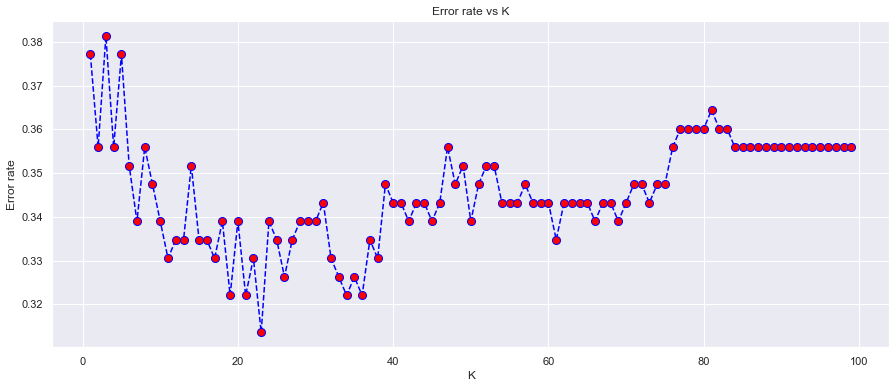

In [41]:
plt.figure(figsize = (15,6))

plt.plot(range(1,100), error, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor='red', markersize = 8)

plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

#### From here -- looks like k around 22 is best

In [42]:
def get_classification(k):

    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    
    print(classification_report(y_test, pred))

In [49]:
get_classification(23)

              precision    recall  f1-score   support

           0       0.68      0.88      0.76       137
           1       0.71      0.42      0.53        99

    accuracy                           0.69       236
   macro avg       0.69      0.65      0.65       236
weighted avg       0.69      0.69      0.67       236



#### ^^ Improved 8% 

In [50]:
df

,fare,age,survived
0,7.2500,22.0,0
1,71.2833,38.0,1
2,7.9250,26.0,1
3,53.1000,35.0,1
4,8.0500,35.0,0
...,...,...,...
885,29.1250,39.0,0
886,13.0000,27.0,0
887,30.0000,19.0,1
889,30.0000,26.0,1


## 6. I need to repeat this in numpy (next notebook), so will save a dataset that's clean

In [59]:
df.head()

,fare,age,survived
0,7.2500,22.0,0
1,71.2833,38.0,1
2,7.9250,26.0,1
3,53.1000,35.0,1
4,8.0500,35.0,0


In [54]:
arr = df.to_numpy()

In [56]:
arr

array([[ 7.25  , 22.    ,  0.    ],
       [71.2833, 38.    ,  1.    ],
       [ 7.925 , 26.    ,  1.    ],
       ...,
       [30.    , 19.    ,  1.    ],
       [30.    , 26.    ,  1.    ],
       [ 7.75  , 32.    ,  0.    ]])

In [58]:
np.save('data/titanic', arr)